In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
#dropping the "sub_grade" column instead of the "grade" produces a huge decreases in MLPClassifier
df_cleaned=pd.read_csv('Cleaned_data_before_num.csv')
#df_cleaned=pd.read_csv('grade_Cleaned_data_before_num.csv')

In [226]:
#try dropping some columns
#discoveries:
#dropping both the recoveries and collection recovery fee lowers the accuracy of the random forest algorithm
#dropping both the total_rec_prncp and CLI lowers the accuracy of the SGDClassifier algorithm (0.97 to 0.86) and the random forest algorthm (0.98 to 0.97)
#df_cleaned.drop(['total_rec_prncp', 'CLI'], axis = 1, inplace = True)
#df_cleaned.drop(['recoveries', 'collection_recovery_fee'], axis = 1, inplace = True)

In [227]:
numerical_df=df_cleaned
numerical_df = pd.get_dummies(numerical_df, columns = ['purpose', 'home_ownership','term', 'verification_status', 'sub_grade'],
                             prefix=['purpose', 'home','term', 'verification', 'grade'])

In [228]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 83 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    997 non-null    int64  
 1   CLI                           997 non-null    int64  
 2   int_rate                      997 non-null    float64
 3   installment                   997 non-null    float64
 4   emp_length                    997 non-null    int64  
 5   annual_inc                    997 non-null    float64
 6   loan_status                   997 non-null    int64  
 7   zip_code                      997 non-null    int64  
 8   dti                           997 non-null    float64
 9   delinq_2yrs                   997 non-null    int64  
 10  inq_last_6mths                997 non-null    int64  
 11  mths_since_last_delinq        997 non-null    float64
 12  mths_since_last_record        997 non-null    float64
 13  open_

In [229]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

In [230]:
all_features = numerical_df.drop("loan_status",axis=1)
Targeted_feature = numerical_df["loan_status"]

# total of 6891 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((697, 82), (300, 82), (697,), (300,))

In [231]:
#very stable
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.9933


Text(0.5, 1.05, 'Confusion_matrix')

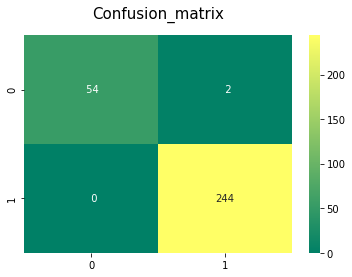

In [232]:
#predict the model output with test data
y_pred = logreg.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [233]:
#not that stable but still stable
from sklearn.ensemble import RandomForestClassifier
RanFor = RandomForestClassifier()
RanFor.fit(X_train,y_train)

RandomForestClassifier()

In [234]:
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of random forest on test set: {:.4f}'.format(RanFor.score(X_test, y_test)))

--------------The Accuracy of the model----------------------------
Accuracy of random forest on test set: 0.9900


In [235]:
#this is kinda unstable: first time 0.98, then 0.94, then 0.99 and 0.96
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=100)
clf.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', max_iter=100)

In [236]:
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of SGDClassifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))

--------------The Accuracy of the model----------------------------
Accuracy of SGDClassifier on test set: 0.9867


In [237]:
#not so good (accuracy of 0.81) but very stable
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [238]:
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of MLPClassifier on test set: {:.4f}'.format(clf2.score(X_test, y_test)))

--------------The Accuracy of the model----------------------------
Accuracy of MLPClassifier on test set: 0.8133
